Mounted at /content/drive


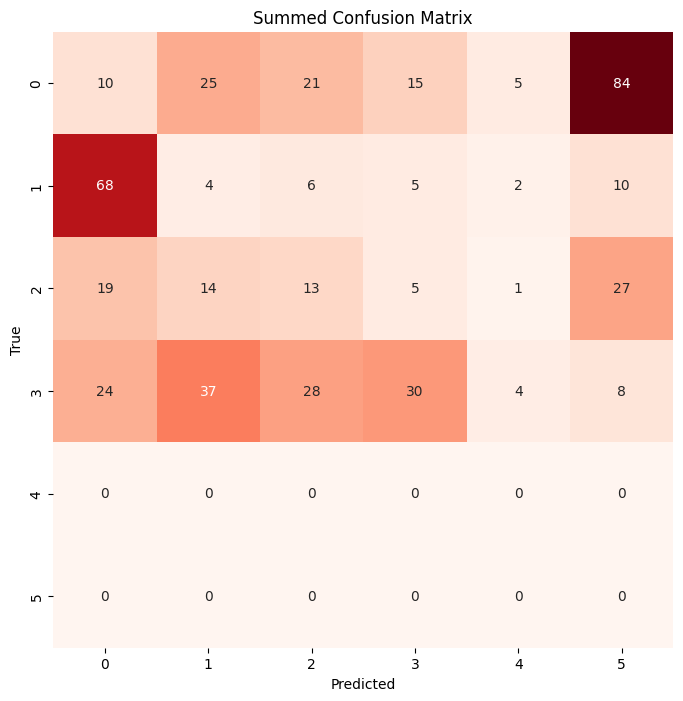

In [1]:
# Mount Google Drive (for Colab)
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

!pip install pytesseract opencv-python

import os
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import seaborn as sn

# Set the number of categories (matrix size)
categories = 6  # Change this to match your confusion matrix size

# Path to the folder containing confusion matrix images
image_folder = '/content/drive/My Drive/results/dense121hirise'  # Update as needed

# Function to extract matrix from image using OCR
def extract_matrix_from_image(image_path, categories):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Optional: thresholding to improve OCR
    _, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
    # OCR
    text = pytesseract.image_to_string(thresh, config='--psm 6 digits')
    # Parse numbers from text
    numbers = [int(s) for s in text.split() if s.isdigit()]
    if len(numbers) != categories * categories:
        print(f"Warning: {image_path} does not have expected number of values ({len(numbers)} found)")
        # Pad or truncate as needed
        numbers = (numbers + [0] * (categories * categories))[:categories * categories]
    matrix = np.array(numbers).reshape((categories, categories))
    return matrix

# Read all images and extract matrices
matrices = []
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        path = os.path.join(image_folder, filename)
        matrix = extract_matrix_from_image(path, categories)
        matrices.append(matrix)

# Sum all matrices
if matrices:
    sum_matrix = np.sum(matrices, axis=0)
else:
    sum_matrix = np.zeros((categories, categories), dtype=int)

# Display summed confusion matrix
plt.figure(figsize=(8,8))
sn.heatmap(sum_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Summed Confusion Matrix')
plt.show()